## Here, I have imported all libraries which is needed

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read CSV File

In [54]:
df = pd.read_csv('dataset.csv')

## How our data look

In [55]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [56]:
#checking unique values 

df['Age Range'].unique()

array([1, 2], dtype=int64)

In [57]:
# df[Gender'].unique()

## How Big our data

In [58]:
df.shape

(237, 4)

## Checking null values

In [59]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

## Mathmatical View of data

In [60]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


## Datatypes of our columns

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


## Checking relation our columns

In [62]:
df.corr()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
Gender,1.000000,-0.088652,-0.514050,-0.465266
Age Range,-0.088652,1.000000,-0.105428,-0.169438
Head Size(cm^3),-0.514050,-0.105428,1.000000,0.799570
Brain Weight(grams),-0.465266,-0.169438,0.799570,1.000000


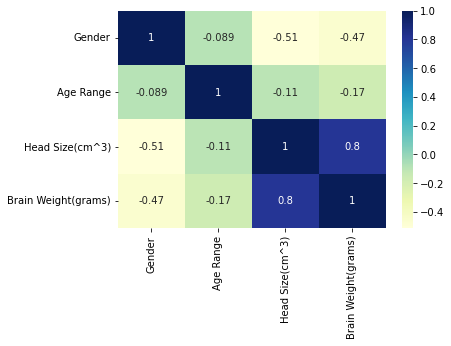

In [63]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

plt.show()

## Checking outliers

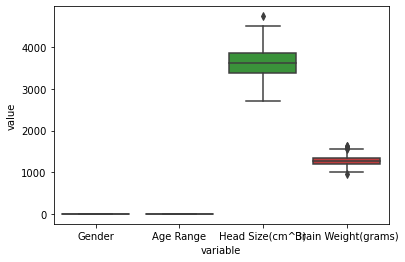

In [64]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

In [65]:
#eqality of two columns

df['Gender'].equals(df['Age Range'])

False

In [66]:
# color_dict={1:'red',3:'green',2:'blue'}
# sns.scatterplot('Gender','Head Size(cm^3)',hue='Brain Weight(grams)',data=df)

## Divide data for train and test

In [67]:
X = df.iloc[:,:3]


In [68]:
y = df.iloc[:,-1:]
y

,Brain Weight(grams)
0,1530
1,1297
2,1335
3,1282
4,1590
...,...
232,1110
233,1215
234,1104
235,1170


## Applying SkLearn method for train and testing seperation

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
                                               
X_train.shape,X_test.shape 

((165, 3), (72, 3))

In [70]:
X_train

,Gender,Age Range,Head Size(cm^3)
66,1,2,3415
26,1,1,4036
76,1,2,3558
215,2,2,3156
210,2,2,2937
...,...,...,...
67,1,2,3372
192,2,2,3000
117,1,2,3900
47,1,1,3165


In [71]:
X_test

,Gender,Age Range,Head Size(cm^3)
173,2,1,3724
152,2,1,3680
106,1,2,4032
111,1,2,3524
125,1,2,3782
...,...,...,...
4,1,1,4177
104,1,2,3618
61,1,2,3393
159,2,1,3269


In [72]:
y_train

,Brain Weight(grams)
66,1310
26,1490
76,1225
215,1225
210,1070
...,...
67,1154
192,1090
117,1270
47,1215


In [73]:
y_test

,Brain Weight(grams)
173,1280
152,1321
106,1425
111,1250
125,1350
...,...
4,1590
104,1290
61,1175
159,1241


## Applying Feature Scaling method Standardization for sacale our features

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled  = scaler.transform(X_test)
scaler.mean_

array([1.42424242e+00, 1.54545455e+00, 3.64791515e+03])

In [76]:
x_train_scaled

array([[-8.58395075e-01,  9.12870929e-01, -6.37635646e-01],
       [-8.58395075e-01, -1.09544512e+00,  1.06243296e+00],
       [-8.58395075e-01,  9.12870929e-01, -2.46154470e-01],
       [ 1.16496475e+00,  9.12870929e-01, -1.34668197e+00],
       [ 1.16496475e+00,  9.12870929e-01, -1.94622307e+00],
       [-8.58395075e-01, -1.09544512e+00,  8.59848293e-01],
       [-8.58395075e-01, -1.09544512e+00,  1.53330542e+00],
       [-8.58395075e-01, -1.09544512e+00,  3.53386631e-01],
       [ 1.16496475e+00, -1.09544512e+00, -9.46987904e-01],
       [-8.58395075e-01, -1.09544512e+00,  3.00888831e+00],
       [-8.58395075e-01, -1.09544512e+00,  3.80762937e-01],
       [ 1.16496475e+00,  9.12870929e-01,  2.38406146e-01],
       [-8.58395075e-01,  9.12870929e-01,  5.97035755e-01],
       [-8.58395075e-01, -1.09544512e+00,  6.62738889e-01],
       [-8.58395075e-01,  9.12870929e-01, -1.80451336e-01],
       [-8.58395075e-01,  9.12870929e-01,  1.28900922e-01],
       [-8.58395075e-01, -1.09544512e+00

### Here we're making dataframe b'cause StandardScaler does covert our column into array

In [77]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=X_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=X_test.columns)

## Now our data in same scale

In [78]:
x_train_scaled

,Gender,Age Range,Head Size(cm^3)
0,-0.858395,0.912871,-0.637636
1,-0.858395,-1.095445,1.062433
2,-0.858395,0.912871,-0.246154
3,1.164965,0.912871,-1.346682
4,1.164965,0.912871,-1.946223
...,...,...,...
160,-0.858395,0.912871,-0.755354
161,1.164965,0.912871,-1.773752
162,-0.858395,0.912871,0.690115
163,-0.858395,-1.095445,-1.322043


In [79]:
x_test_scaled

,Gender,Age Range,Head Size(cm^3)
0,1.164965,-1.095445,0.208292
1,1.164965,-1.095445,0.087836
2,-0.858395,0.912871,1.051482
3,-0.858395,0.912871,-0.339234
4,-0.858395,0.912871,0.367075
...,...,...,...
67,-0.858395,-1.095445,1.448439
68,-0.858395,0.912871,-0.081897
69,-0.858395,0.912871,-0.697864
70,1.164965,-1.095445,-1.037330


In [80]:
x_test_scaled.shape

(72, 3)

In [81]:
np.round(X_train.describe(), 1)

,Gender,Age Range,Head Size(cm^3)
count,165.0,165.0,165.0
mean,1.4,1.5,3647.9
std,0.5,0.5,366.4
min,1.0,1.0,2720.0
25%,1.0,1.0,3383.0
50%,1.0,2.0,3642.0
75%,2.0,2.0,3890.0
max,2.0,2.0,4747.0


In [82]:
np.round(x_train_scaled.describe(), 1)

,Gender,Age Range,Head Size(cm^3)
count,165.0,165.0,165.0
mean,-0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-0.9,-1.1,-2.5
25%,-0.9,-1.1,-0.7
50%,-0.9,0.9,-0.0
75%,1.2,0.9,0.7
max,1.2,0.9,3.0


## Now we apply supervied learning algo. name LinearRegression for prediction

In [83]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train_scaled,y_train)

LinearRegression()

In [84]:
predict = ln.predict(x_test_scaled)
predict

array([[1309.13014959],
       [1298.70362709],
       [1372.33036648],
       [1251.95142497],
       [1313.08876141],
       [1264.88001285],
       [1480.38705414],
       [1263.86956331],
       [1398.8080217 ],
       [1313.22116259],
       [1391.76161295],
       [1127.43948907],
       [1186.91806057],
       [1325.41101526],
       [1204.21660925],
       [1241.5947198 ],
       [1287.32923892],
       [1344.84226173],
       [1251.07337661],
       [1299.04515875],
       [1262.3153636 ],
       [1402.66206828],
       [1342.70956394],
       [1292.41009898],
       [1344.30574502],
       [1331.03562549],
       [1178.08771916],
       [1305.44325209],
       [1466.64300177],
       [1103.68026318],
       [1175.06973955],
       [1267.35424229],
       [1225.06965424],
       [1375.71771369],
       [1358.28676382],
       [1235.43359287],
       [1327.85049679],
       [1347.34432712],
       [1323.04135106],
       [1243.89456668],
       [1331.09820935],
       [1176.296

In [85]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,predict)

In [86]:
print("Scaled",accuracy)

Scaled 0.6694394534965766


<AxesSubplot:xlabel='Brain Weight(grams)'>

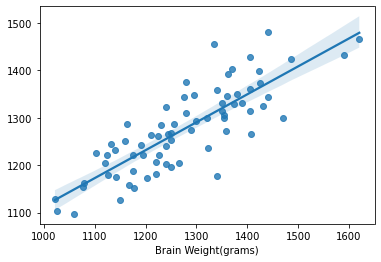

In [87]:
sns.regplot(x=y_test,y=predict,data=df)

In [88]:
# from sklearn.tree import DecisionTreeClassifier

In [89]:
# dtc = DecisionTreeClassifier()

In [90]:
# dtc.fit(X_train,y_train)

In [91]:
# predict = dtc.predict(X_test)

In [92]:
# print("Actual",accuracy_score(y_test,predict))

In [93]:
# from sklearn.svm import SVR

In [94]:
# sv = SVR()

In [95]:
# sv.fit(X_train,y_train)

In [96]:
# pre = sv.predict(X_test)

In [97]:
# print('Actual:- ',r2_score(y_test,pre))